In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,})
print(df.shape)
df.head(3)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom


In [ ]:
# Check any duplicated data set and column formats
print(sum(df.duplicated(keep="first")),"transaction rows affected")
df.dtypes

5268 transaction rows affected


,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,object
Country,object


In [ ]:
print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming 'InvoiceDate' is in a string format that needs conversion
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

# Convert 'StockCode' to uppercase
df['StockCode'] = df['StockCode'].str.upper()

# Extract date only from 'InvoiceDate'
df['InvoiceDateOnly'] = df['InvoiceDate'].dt.date

# Optionally extract time only if needed
df['InvoiceTime'] = df['InvoiceDate'].dt.time

# Calculate month-end date
df['mth_end_dt'] = df['InvoiceDate'] + pd.offsets.MonthEnd(0)

# Display the shape of the DataFrame
print(df.shape)

# Display the DataFrame's columns and their data types
print(df.dtypes)


(541909, 11)
InvoiceNo                  object
StockCode                  object
Description                object
Quantity                    int64
InvoiceDate        datetime64[ns]
UnitPrice                 float64
CustomerID                 object
Country                    object
InvoiceDateOnly            object
InvoiceTime                object
mth_end_dt         datetime64[ns]
dtype: object


In [ ]:
import pandas as pd

# Descriptive statistics with custom percentiles for numerical columns
print("Descriptive Statistics for Numerical Columns:")
print(df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]))

# Descriptive statistics for object (categorical) columns
print("\nDescriptive Statistics for Object Columns:")
print(df.describe(include=[object]))


Descriptive Statistics for Numerical Columns:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
1%         -2.000000            2010-12-03 11:13:00       0.190000   
5%          1.000000            2010-12-13 09:35:00       0.420000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
95%        29.000000            2011-11-30 14:41:00       9.950000   
99%       100.000000            2011-12-08 09:28:00      18.000000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

                          mth_end_dt  
coun

Discoveries: 1.Existence of outliers in Quantity. 99% of data have quantity up until 100 but max and min quantities are 5 figure digits. 2.Existence of outliers in UnitPrice. Interquartile range of UnitPrices is between 0.42 sterling until 4.13 sterling however min and max UnitPrice are 5 figure digits. 3.Existence of negative quantities and unitprices. 4.Number of unique values and in each object columns.

In [ ]:


# Count the number of rows with negative Quantity
negative_quantity_count = (df['Quantity'] < 0).sum()

# Count the number of rows with negative UnitPrice
negative_unit_price_count = (df['UnitPrice'] < 0).sum()

print("The number of rows with negative Quantity:", negative_quantity_count)
print("The number of rows with negative UnitPrice:", negative_unit_price_count)


The number of rows with negative Quantity: 10624
The number of rows with negative UnitPrice: 2


In [ ]:
#Count Unique value in all dataset columns
df.nunique()

,0
InvoiceNo,25900
StockCode,3958
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38
InvoiceDateOnly,305
InvoiceTime,774


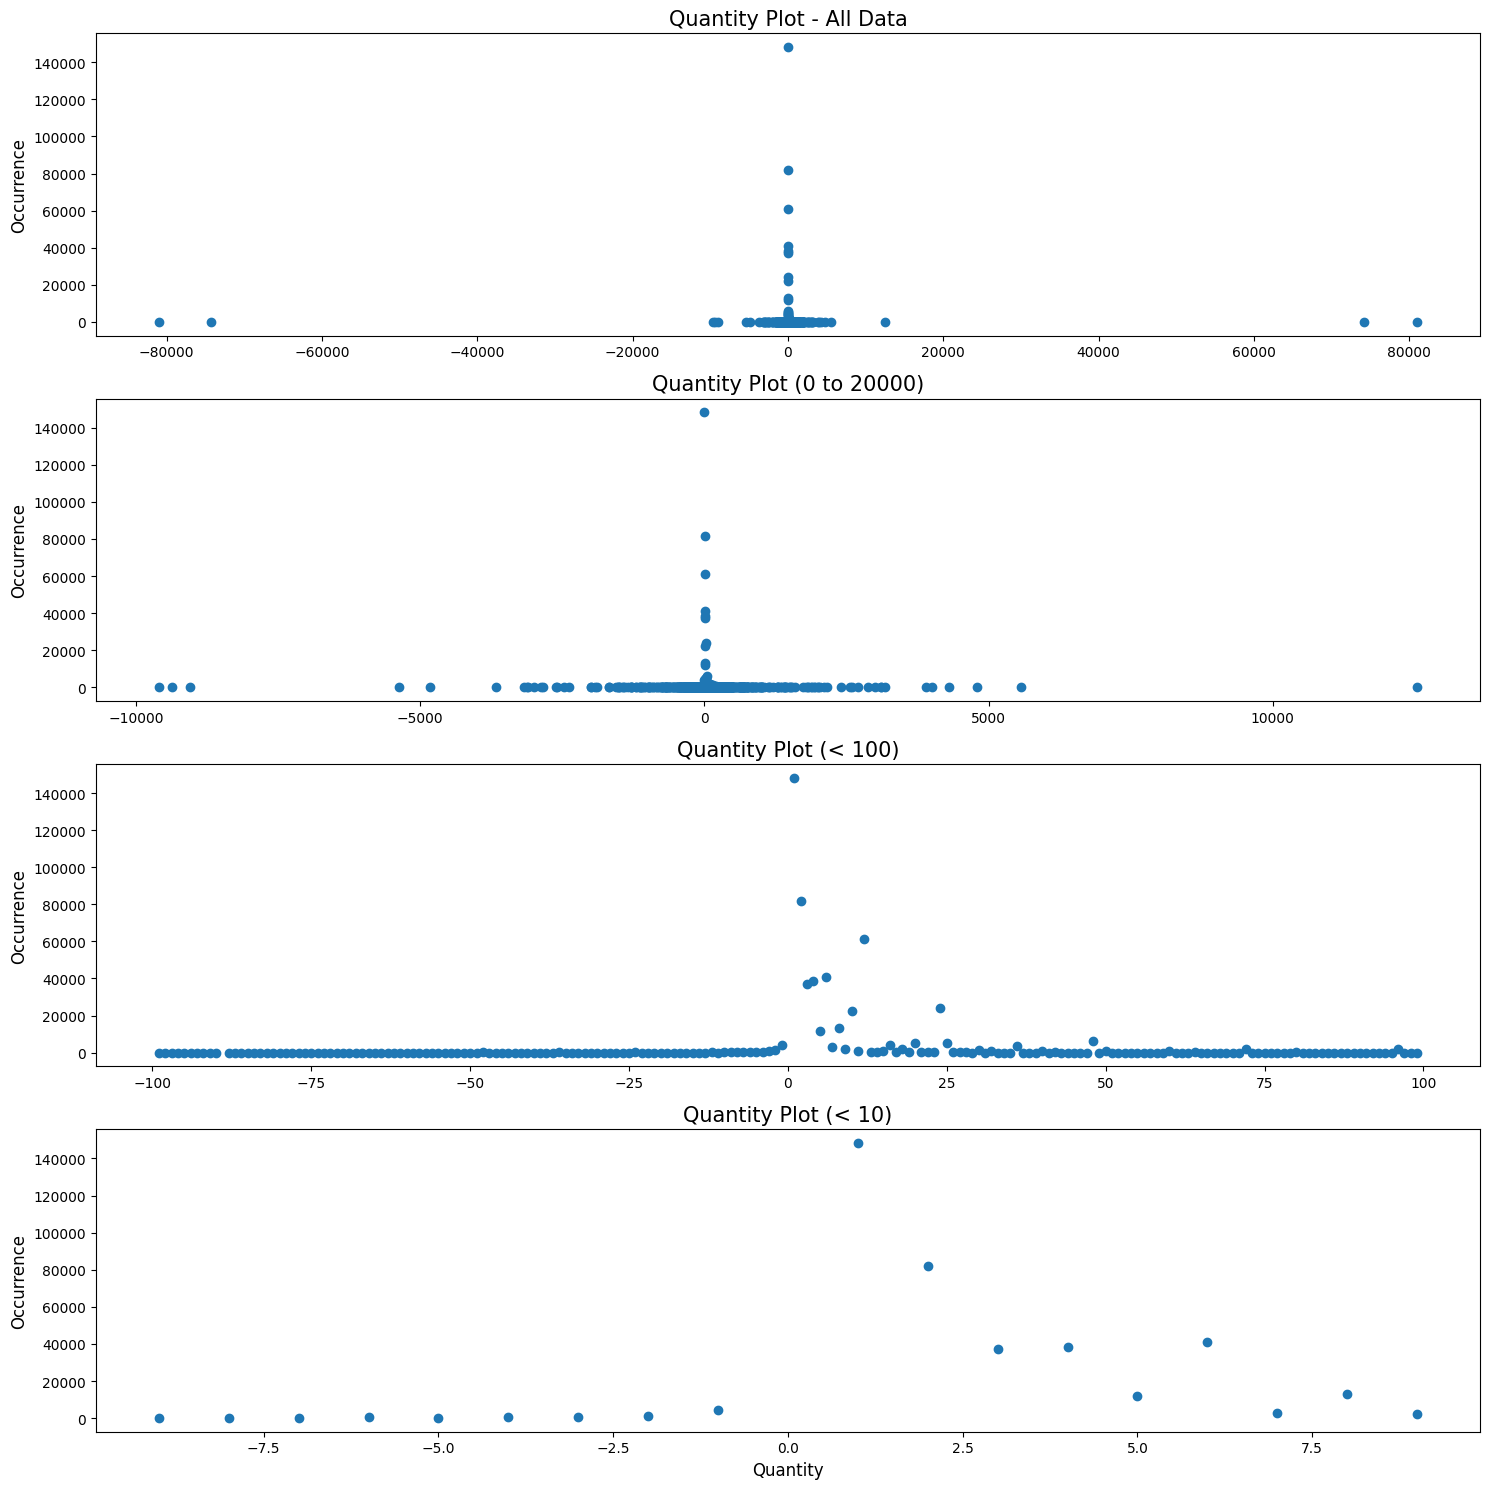

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

# Plot for all quantities
x = df.Quantity.value_counts().reset_index().values.T
plt.subplot(411)
plt.scatter(x[0], x[1], marker='o')
plt.title('Quantity Plot - All Data', fontsize=15)
plt.ylabel('Occurrence', fontsize=12)

# Plot for quantities < 20000
x = df[df['Quantity'].abs() < 20000].Quantity.value_counts().reset_index().values.T
plt.subplot(412)
plt.scatter(x[0], x[1], marker='o')
plt.title('Quantity Plot (0 to 20000)', fontsize=15)
plt.ylabel('Occurrence', fontsize=12)

# Plot for quantities < 100 (99th percentile)
x = df[df['Quantity'].abs() < 100].Quantity.value_counts().reset_index().values.T
plt.subplot(413)
plt.scatter(x[0], x[1], marker='o')
plt.title('Quantity Plot (< 100)', fontsize=15)
plt.ylabel('Occurrence', fontsize=12)

# Plot for quantities < 10 (3rd quartile)
x = df[df['Quantity'].abs() < 10].Quantity.value_counts().reset_index().values.T
plt.subplot(414)
plt.scatter(x[0], x[1], marker='o')
plt.title('Quantity Plot (< 10)', fontsize=15)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Occurrence', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Filter rows where Quantity is greater than 60,000
outliers = df[df['Quantity'].abs() > 60000]

print(outliers)

       InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624    C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   
540422   C581484     23843     PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  UnitPrice CustomerID         Country  \
61619  2011-01-18 10:01:00       1.04      12346  United Kingdom   
61624  2011-01-18 10:17:00       1.04      12346  United Kingdom   
540421 2011-12-09 09:15:00       2.08      16446  United Kingdom   
540422 2011-12-09 09:27:00       2.08      16446  United Kingdom   

       InvoiceDateOnly InvoiceTime          mth_end_dt  
61619       2011-01-18    10:01:00 2011-01-31 10:01:00  
61624       2011-01-18    10:17:00 2011-01-31 10:17:00  
540421      2011-12-09    09:15:00 2011-12-31 09:15:00  
540422      2011-12-09    09:27:00 2011-12-31 09:27:00  


In [ ]:
# Filter rows where Quantity is between 5,000 and 20,000
filtered_df = df[(df['Quantity'].abs() > 5000) & (df['Quantity'].abs() < 20000)]

print(filtered_df)


       InvoiceNo StockCode                          Description  Quantity  \
4287     C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
74614     542504     37413                                  NaN      5568   
115818    546152    72140F                           throw away     -5368   
225528    556687     23003         Printing smudges/thrown away     -9058   
225529    556690     23005         printing smudges/thrown away     -9600   
225530    556691     23005         printing smudges/thrown away     -9600   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

               InvoiceDate  UnitPrice CustomerID         Country  \
4287   2010-12-02 14:23:00       0.03      15838  United Kingdom   
74614  2011-01-28 12:03:00       0.00        NaN  United Kingdom   
115818 2011-03-09 17:25:00       0.00        NaN  United Kingdom   
225528 2011-06-14 10:36:00       0.00        NaN  United Kingdom   
225529 2011-06-14 10:37:00       0.00      

Discovery:
1.Length of stockcode is not restricted to 5 only.
2.Existence of non-existing and weird descriptions in Description field.
3.Existence of non-existing CustomerID.¶

In [ ]:
print('Number of rows in each column affected by existence of non-existing values:')
df.isnull().sum()

Number of rows in each column affected by existence of non-existing values:


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
InvoiceDateOnly,0
InvoiceTime,0


It seem like we have Nan of:
1217 in Description
94003 in Customer ID




In [ ]:
#Now lets check what is in our negative quantity
df[df["Quantity"]<=0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateOnly,InvoiceTime,mth_end_dt
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,2010-12-01,09:41:00,2010-12-31 09:41:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010-12-01,09:49:00,2010-12-31 09:49:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,10:24:00,2010-12-31 10:24:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,10:24:00,2010-12-31 10:24:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,10:24:00,2010-12-31 10:24:00
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,10:24:00,2010-12-31 10:24:00
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,2010-12-01,10:24:00,2010-12-31 10:24:00
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,10:24:00,2010-12-31 10:24:00
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,10:24:00,2010-12-31 10:24:00
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom,2010-12-01,12:38:00,2010-12-31 12:38:00


In [ ]:

# Filter rows where Description is NaN
df_na_description = df[df['Description'].isnull()]

# Descriptive statistics for numeric columns where Description is NaN
print('Descriptive statistics of numeric columns with NaN in Description:\n', df_na_description.describe())

# Descriptive statistics for CustomerID where Description is NaN
print('\nDescriptive statistics of CustomerID with NaN in Description:\n', df_na_description['CustomerID'].describe())


Descriptive statistics of numeric columns with NaN in Description:
           Quantity                    InvoiceDate  UnitPrice  \
count  1454.000000                           1454     1454.0   
mean     -9.359697  2011-05-22 18:40:24.883080960        0.0   
min   -3667.000000            2010-12-01 11:52:00        0.0   
25%     -24.000000            2011-03-22 17:04:15        0.0   
50%      -3.000000            2011-05-03 13:35:30        0.0   
75%       4.000000            2011-08-04 15:42:45        0.0   
max    5568.000000            2011-12-08 14:06:00        0.0   
std     243.238758                            NaN        0.0   

                          mth_end_dt  
count                           1454  
mean   2011-06-06 19:19:02.352132096  
min              2010-12-31 09:26:00  
25%              2011-03-31 12:46:00  
50%              2011-05-31 11:17:30  
75%              2011-08-31 10:39:15  
max              2011-12-31 18:35:00  
std                              NaN  

Des

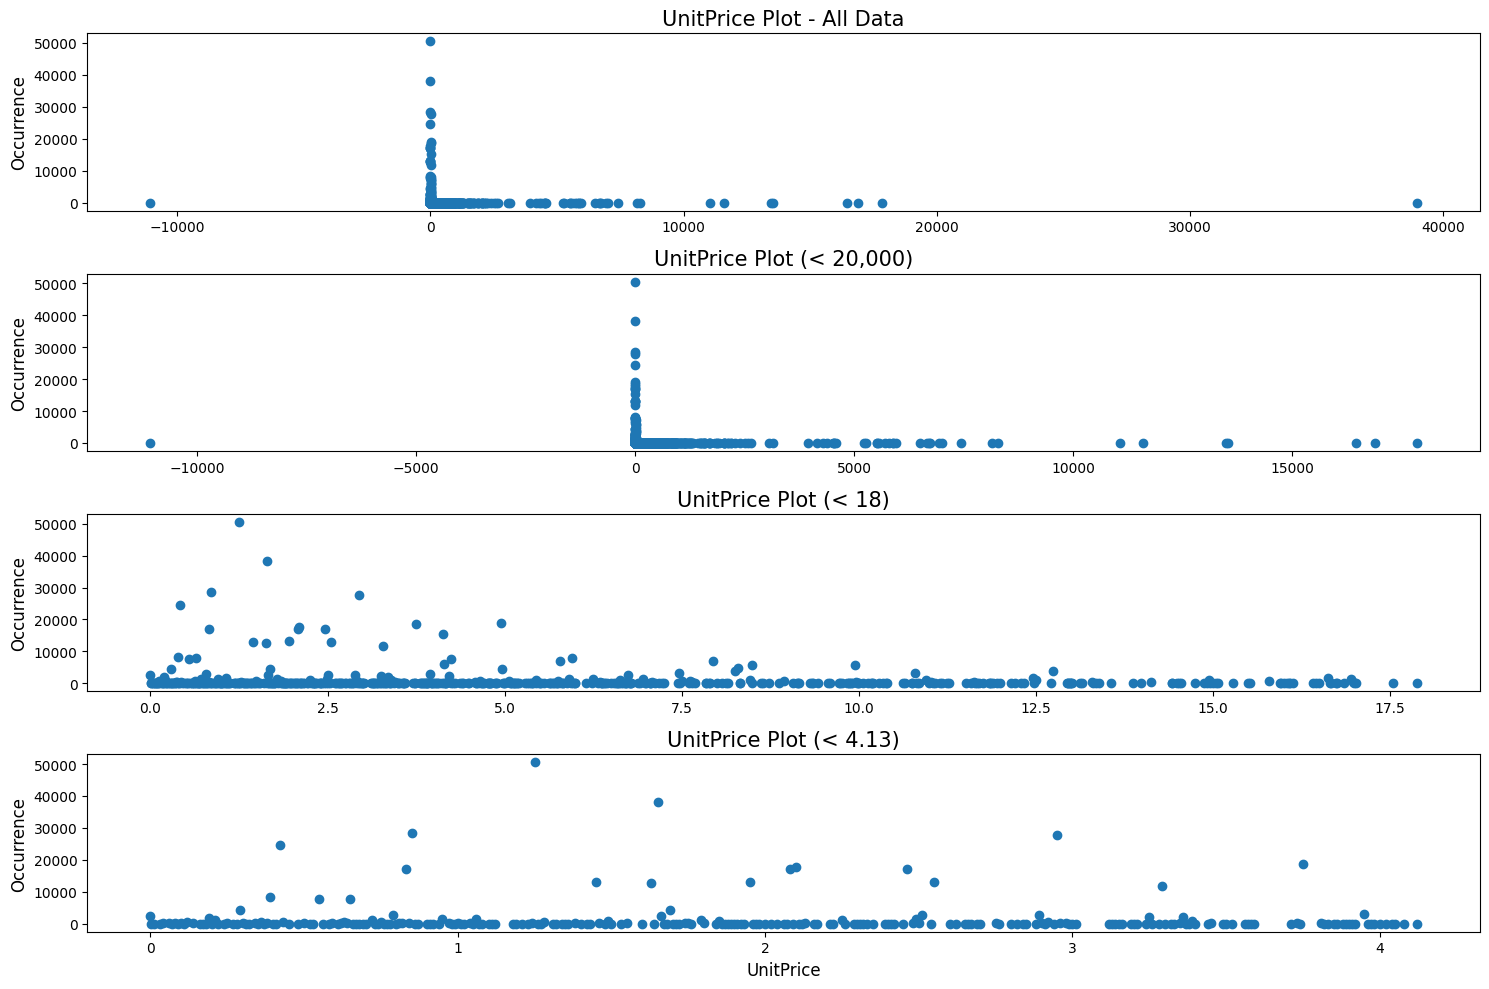

In [ ]:


plt.figure(figsize=(15, 10))

# Plot for all UnitPrices
x = df.UnitPrice.value_counts().reset_index().values.T
plt.subplot(411)
plt.scatter(x[0], x[1], marker='o')
plt.title('UnitPrice Plot - All Data', fontsize=15)
plt.ylabel('Occurrence', fontsize=12)

# Plot for UnitPrices < 20,000
x = df[df['UnitPrice'].abs() < 20000].UnitPrice.value_counts().reset_index().values.T
plt.subplot(412)
plt.scatter(x[0], x[1], marker='o')
plt.title('UnitPrice Plot (< 20,000)', fontsize=15)
plt.ylabel('Occurrence', fontsize=12)

# Plot for UnitPrices < 18 (99th percentile)
x = df[df['UnitPrice'].abs() < 18].UnitPrice.value_counts().reset_index().values.T
plt.subplot(413)
plt.scatter(x[0], x[1], marker='o')
plt.title('UnitPrice Plot (< 18)', fontsize=15)
plt.ylabel('Occurrence', fontsize=12)

# Plot for UnitPrices < 4.13 (3rd quartile)
x = df[df['UnitPrice'].abs() < 4.13].UnitPrice.value_counts().reset_index().values.T
plt.subplot(414)
plt.scatter(x[0], x[1], marker='o')
plt.title('UnitPrice Plot (< 4.13)', fontsize=15)
plt.xlabel('UnitPrice', fontsize=12)
plt.ylabel('Occurrence', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[df['UnitPrice'].abs()>10000]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateOnly,InvoiceTime,mth_end_dt
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,2010-12-07,15:04:00,2010-12-31 15:04:00
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,2010-12-07,15:08:00,2010-12-31 15:08:00
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,2010-12-07,15:34:00,2010-12-31 15:34:00
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,2010-12-07,15:49:00,2010-12-31 15:49:00
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,2011-01-05,09:55:00,2011-01-31 09:55:00
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,2011-01-05,09:57:00,2011-01-31 09:57:00
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,2011-06-10,15:31:00,2011-06-30 15:31:00
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,2011-08-12,14:50:00,2011-08-31 14:50:00
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,2011-08-12,14:51:00,2011-08-31 14:51:00
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,2011-08-12,14:52:00,2011-08-31 14:52:00


The stockcodes aren't linked to any other item purchases - single item per invoice.

In [ ]:
df[df['InvoiceNo']=='537632']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateOnly,InvoiceTime,mth_end_dt
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,2010-12-07,15:08:00,2010-12-31 15:08:00


In [ ]:
import pandas as pd

# Define new variables
df['length_stockcode'] = df['StockCode'].str.len()
df['length_invoiceno'] = df['InvoiceNo'].str.len()
df['invoiceno_letter1'] = df['InvoiceNo'].str[0]

# Print length of InvoiceNo
print("Length of InvoiceNo:\n",
      df['length_invoiceno'].value_counts(sort=True)
      .reset_index(name='no_rows')
      .rename(columns={'index': 'Length of InvoiceNo'}))

# Print first letter of InvoiceNo
print("\nFirst letter for InvoiceNo:\n",
      df['invoiceno_letter1'].value_counts(sort=True)
      .reset_index(name='no_rows')
      .rename(columns={'index': 'Invoice First Letter'}))

# Cross-tabulation of first letter of InvoiceNo against InvoiceNo length
print("\nCross table: First letter for InvoiceNo against InvoiceNo length:\n",
      pd.crosstab(df['invoiceno_letter1'], df['length_invoiceno'], margins=True))

# Print length of StockCode
print("\nLength of StockCode:\n",
      df['length_stockcode'].value_counts(sort=True)
      .reset_index(name='no_rows')
      .rename(columns={'index': 'Length of StockCode'}))


Length of InvoiceNo:
    length_invoiceno  no_rows
0                 6   532618
1                 7     9291

First letter for InvoiceNo:
   invoiceno_letter1  no_rows
0                 5   532618
1                 C     9288
2                 A        3

Cross table: First letter for InvoiceNo against InvoiceNo length:
 length_invoiceno        6     7     All
invoiceno_letter1                      
5                  532618     0  532618
A                       0     3       3
C                       0  9288    9288
All                532618  9291  541909

Length of StockCode:
    length_stockcode  no_rows
0                 5   487036
1                 6    51488
2                 4     1276
3                 1      715
4                 3      710
5                 7      390
6                 2      144
7                12       71
8                 9       48
9                 8       31


In [ ]:
#display what are the unique stockcodes for invoiceno with length below 5 or above 8
print("\nDescription for StockCode with length below 5 or above 8 and number of lines affected:")
      #\n"\
#      ,df[(df['length_stockcode']<5) | (df['length_stockcode']>8)]\
#      [['length_stockcode','invoiceno_letter1','StockCode','Description']]\
#      .groupby(by=['invoiceno_letter1','length_stockcode','StockCode']).Description.value_counts().reset_index(name='Freq'))

df[(df['length_stockcode']<5) | (df['length_stockcode']>8)]\
[['length_stockcode','invoiceno_letter1','StockCode','Description']]\
.groupby(by=['length_stockcode','StockCode','invoiceno_letter1']).Description.value_counts().reset_index(name='Freq')


Description for StockCode with length below 5 or above 8 and number of lines affected:


,length_stockcode,StockCode,invoiceno_letter1,Description,Freq
0,1,B,A,Adjust bad debt,3
1,1,D,C,Discount,77
2,1,M,5,Manual,328
3,1,M,C,Manual,244
4,1,S,5,SAMPLES,2
5,1,S,C,SAMPLES,61
6,2,C2,5,CARRIAGE,141
7,2,C2,C,CARRIAGE,2
8,3,DOT,5,DOTCOM POSTAGE,708
9,3,DOT,C,DOTCOM POSTAGE,1


Discoveries:¶
1.Retailer is dotcomgiftshop. Gift voucher is part of their product offering. Website: https://www.dotcomgiftshop.com
2.StockCode with length<=4 have nothing to do with items at all.
3.In StockCodes with length 9 or 12, some descriptions does not refer to product item descriptions (AMAZONFEE and BANK CHARGES)¶

In [ ]:
#analysing stockcode and invoiceno field

#display what are the unique stockcodes for invoiceno of length 7 or 8
print("\nDescription for StockCode with length 7 or 8 and number of lines affected:\n")
df[(df['length_stockcode']==7) | (df['length_stockcode']==8)]\
[['length_stockcode','invoiceno_letter1','StockCode','Description']]\
.groupby(by=['length_stockcode','StockCode']).Description.value_counts().reset_index(name='freq')


Description for StockCode with length 7 or 8 and number of lines affected:



,length_stockcode,StockCode,Description,freq
0,7,15056BL,EDWARDIAN PARASOL BLACK,388
1,7,79323GR,"Unsaleable, destroyed.",1
2,7,79323LP,"Unsaleable, destroyed.",1
3,8,DCGS0003,BOXED GLASS ASHTRAY,4
4,8,DCGS0003,ebay,1
5,8,DCGS0004,HAYNES CAMPER SHOULDER BAG,1
6,8,DCGS0067,ebay,1
7,8,DCGS0068,ebay,1
8,8,DCGS0069,OOH LA LA DOGS COLLAR,1
9,8,DCGS0069,ebay,1


In [ ]:
#From initial assessment, we found out most problematic description contain lower case letter and '?' symbol
df[df['Description'].str.contains("^[a-z]|\\?",case=True, na=False)].\
drop(['mth_end_dt','length_stockcode','length_invoiceno','invoiceno_letter1'],axis=1).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateOnly,InvoiceTime
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom,2010-12-03,12:08:00
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom,2010-12-03,12:08:00
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom,2010-12-03,16:50:00
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom,2010-12-06,15:35:00
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom,2010-12-06,15:36:00
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom,2010-12-06,16:10:00
15651,537639,22734,amazon,30,2010-12-07 15:29:00,0.0,NaN,United Kingdom,2010-12-07,15:29:00
21338,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom,2010-12-09,14:10:00
21518,538090,20956,?,-723,2010-12-09 14:48:00,0.0,NaN,United Kingdom,2010-12-09,14:48:00
24290,538348,22734,amazon,30,2010-12-10 14:59:00,0.0,NaN,United Kingdom,2010-12-10,14:59:00


Seems like all the error description have:
1.null CustomerID
2.UnitPrice=0
Test if using these criteria will only eliminate weird descriptions:

In [ ]:
print('no of rows affected:',df[(df.CustomerID.isnull()) & (df['UnitPrice']==0)].shape[0])
df[(df.CustomerID.isnull()) & (df['UnitPrice']==0)]\
.Description.value_counts().reset_index(name='freq').rename(columns={'index':'Description'}).head(20)

no of rows affected: 2475


,Description,freq
0,check,159
1,?,47
2,damages,45
3,damaged,43
4,found,25
5,sold as set on dotcom,20
6,adjustment,16
7,Damaged,14
8,"Unsaleable, destroyed.",9
9,thrown away,9


Seems like it also removes some valid product descriptions, but these products have UnitPrices = 0 which is not expected. The file containing these transactions can be passed to data owner for investigation purposes.

In [ ]:
#perform modification on df1
df1=df.copy()
df1.shape

(541909, 14)

In [ ]:

#1. Separate missing description rows
df.NAdesc=df1[(df1.Description.isnull())]
print(df.NAdesc.shape)
df.NAdesc.to_csv('No descriptions.csv',index=False)
df1=df1[~(df1.Description.isnull())]
print(df1.shape)

(1454, 14)
(540455, 14)


<ipython-input-99-6343c8a1a553>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
#2. Separate length-stockcode<5, StockCode=['AMAZONFEE','BANK CHARGES']
df.otherdesc=df1[(df1['length_stockcode']<5) | (df1['StockCode']=='AMAZONFEE') \
                       | (df1['StockCode']=='BANK CHARGES')]
print(df.otherdesc.shape)
df.otherdesc.to_csv('Other descriptions.csv',index=False)
df1=df1[~((df1['length_stockcode']<5) | (df1['StockCode']=='AMAZONFEE') \
                       | (df1['StockCode']=='BANK CHARGES'))]
print(df1.shape)

(2910, 14)
(537545, 14)


<ipython-input-100-581f402dc9bb>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
#3. Remove rows that contain problematic description and UnitPrice=0 into a new file.
df.weird=df1[(df1.CustomerID.isnull()) & (df1['UnitPrice']==0)]
print(df.weird.shape)
df.weird.to_csv('weird description and or unitprice.csv',index=False)
df1=df1[~((df1.CustomerID.isnull()) & (df1['UnitPrice']==0))]
print(df1.shape)

(1019, 14)
(536526, 14)


<ipython-input-101-22e8e7b016e1>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
#4. to remove Cancelled transactions into a separate dataset
df.Cancel=df1[df1['invoiceno_letter1']=='C']
print(df.Cancel.shape)
df.Cancel.to_csv('Cancelled Transactions v2.csv',index=False)
df1=df1[df1['invoiceno_letter1']!='C']
print(df1.shape)
#we have 9251 row of cancelled transaction

<ipython-input-102-1eaa6ee60a9a>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



(8704, 14)
(527822, 14)


In [ ]:
# Assign value to the missing CustomerID based on the Invoice Number
df1["CustomerID"].fillna("R" + df1["InvoiceNo"], inplace=True)

# Group by CustomerID and Description, and sum only the numeric columns
# Exclude datetime columns from the summation
numeric_columns = df1.select_dtypes(include=['number']).columns.tolist()
NewID = df1.groupby(['CustomerID', 'Description'])[numeric_columns].sum()

# Display the first few rows of the grouped DataFrame
NewID.head()



Quantity  UnitPrice  \
CustomerID Description                                           
12346      MEDIUM CERAMIC TOP STORAGE JAR     74215       1.04   
12347      3D DOG PICTURE PLAYING CARDS         126      14.75   
           3D SHEET OF CAT STICKERS              12       0.85   
           3D SHEET OF DOG STICKERS              12       0.85   
           60 TEATIME FAIRY CAKE CASES           72       1.65   

                                           length_stockcode  length_invoiceno  
CustomerID Description                                                         
12346      MEDIUM CERAMIC TOP STORAGE JAR                 5                 6  
12347      3D DOG PICTURE PLAYING CARDS                  30                30  
           3D SHEET OF CAT STICKERS                       6                 6  
           3D SHEET OF DOG STICKERS                       6                 6  
           60 TEATIME FAIRY CAKE CASES                   15                18

In [ ]:
#Check if there is any lowercase letter in stock code
df1[df1['StockCode'].str.contains("[a-z]",case=True, na=False)]
#No lowercase code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateOnly,InvoiceTime,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1


In [ ]:
#Now let check of negative Quantity
df1[df1["Quantity"]<=0]
#Our negative quantity is zero as most of our negative quantity are inside Nan Description that we removed earlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateOnly,InvoiceTime,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1


In [ ]:
#we check if our problematic Description got removed by the drop negative and zero unit price
from IPython.display import display, HTML
df1.prob=df1[df1['Description'].str.contains("^[a-z]|\\?",case=True, na=False)]
df1.prob1=df1.prob.Description.str.split(expand=True).stack().value_counts().to_frame().reset_index()
HTML(df1.prob1.to_html())
#Our hypothesis is true as all the problematic description also got removed by our previous droping actvities

<ipython-input-106-283aaedf0a3b>:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

<ipython-input-106-283aaedf0a3b>:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,index,count


In [ ]:
#Now let check if the result of our cleaning process
df1.describe()
# We no longer have negative value for our numeric column

,Quantity,InvoiceDate,UnitPrice,mth_end_dt,length_stockcode,length_invoiceno
count,527822.000000,527822,527822.000000,527822,527822.000000,527822.0
mean,10.592605,2011-07-04 21:25:56.563955200,3.266279,2011-07-20 08:20:50.556248576,5.097271,6.0
min,1.000000,2010-12-01 08:26:00,0.000000,2010-12-31 07:48:00,5.000000,6.0
25%,1.000000,2011-03-28 12:23:00,1.250000,2011-03-31 16:05:00,5.000000,6.0
50%,3.000000,2011-07-20 13:26:00,2.080000,2011-07-31 15:17:00,5.000000,6.0
75%,11.000000,2011-10-19 13:38:00,4.130000,2011-10-31 14:27:00,5.000000,6.0
max,80995.000000,2011-12-09 12:50:00,649.500000,2011-12-31 20:01:00,12.000000,6.0
std,156.777506,NaN,4.380758,NaN,0.303728,0.0


In [ ]:
df1.isnull().sum()
#All our Nan have been removed from the description

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
InvoiceDateOnly,0
InvoiceTime,0


In [ ]:
#Check if our new customer ID that been assigned with "R" + InvoiceNo
df1[df1['CustomerID'].str.contains("R",case=False, na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateOnly,InvoiceTime,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,R536544,United Kingdom,2010-12-01,14:32:00,2010-12-31 14:32:00,5,6,5
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,R536544,United Kingdom,2010-12-01,14:32:00,2010-12-31 14:32:00,5,6,5
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,R536544,United Kingdom,2010-12-01,14:32:00,2010-12-31 14:32:00,5,6,5
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,R536544,United Kingdom,2010-12-01,14:32:00,2010-12-31 14:32:00,5,6,5
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,R536544,United Kingdom,2010-12-01,14:32:00,2010-12-31 14:32:00,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541535,581498,85049E,SCANDINAVIAN REDS RIBBONS,4,2011-12-09 10:26:00,3.29,R581498,United Kingdom,2011-12-09,10:26:00,2011-12-31 10:26:00,6,6,5
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,R581498,United Kingdom,2011-12-09,10:26:00,2011-12-31 10:26:00,6,6,5
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,R581498,United Kingdom,2011-12-09,10:26:00,2011-12-31 10:26:00,6,6,5
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,R581498,United Kingdom,2011-12-09,10:26:00,2011-12-31 10:26:00,5,6,5


In [ ]:
# Check again for any Nan Value
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
InvoiceDateOnly,0
InvoiceTime,0


In [ ]:
df1.nunique()

,0
InvoiceNo,19776
StockCode,3803
Description,4017
Quantity,375
InvoiceDate,18335
UnitPrice,501
CustomerID,5706
Country,38
InvoiceDateOnly,305
InvoiceTime,740


In [ ]:
df1.StkDsc=df1.groupby("StockCode")['Description'].nunique().reset_index()
df1stk=df1.StkDsc[df1.StkDsc["Description"]>1]
df1stk.head()
#We have 215 row of stock code that have more than 1 description

<ipython-input-112-fcdb6208786e>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,StockCode,Description
42,16156L,2
100,17107D,3
118,20622,2
170,20725,2
265,20914,2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode

# Initialize plotly offline mode
init_notebook_mode(connected=True)

# Example of creating a plot with Plotly
data = go.Scatter(x=[1, 2, 3, 4], y=[10, 11, 12, 13], mode='lines+markers')
layout = go.Layout(title='Example Plot')
fig = go.Figure(data=data, layout=layout)

# Display the plot
iplot(fig)


In [ ]:
df2 = df1.copy()
df2["Revenue"]=df2["Quantity"]*df2["UnitPrice"]
#Calculte the total Revenue thorught out the year
df2.Revenue.sum()

10272118.869999995

In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame and it's already loaded

# Ensure 'InvoiceDate' is in datetime format
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

# Calculate 'Revenue' if not already done
df2['Revenue'] = df2['Quantity'] * df2['UnitPrice']

# Group the data by day and calculate the total revenue for each day
daily_revenue = df2.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Revenue'].sum().reset_index().sort_values('InvoiceDate')

# Display the result
print(daily_revenue)



    InvoiceDate    Revenue
0    2010-12-01   57626.33
1    2010-12-02   47715.38
2    2010-12-03   44833.98
3    2010-12-04       0.00
4    2010-12-05   31318.99
..          ...        ...
369  2011-12-05   80132.35
370  2011-12-06   55411.69
371  2011-12-07   72922.70
372  2011-12-08   77694.64
373  2011-12-09  198114.26

[374 rows x 2 columns]


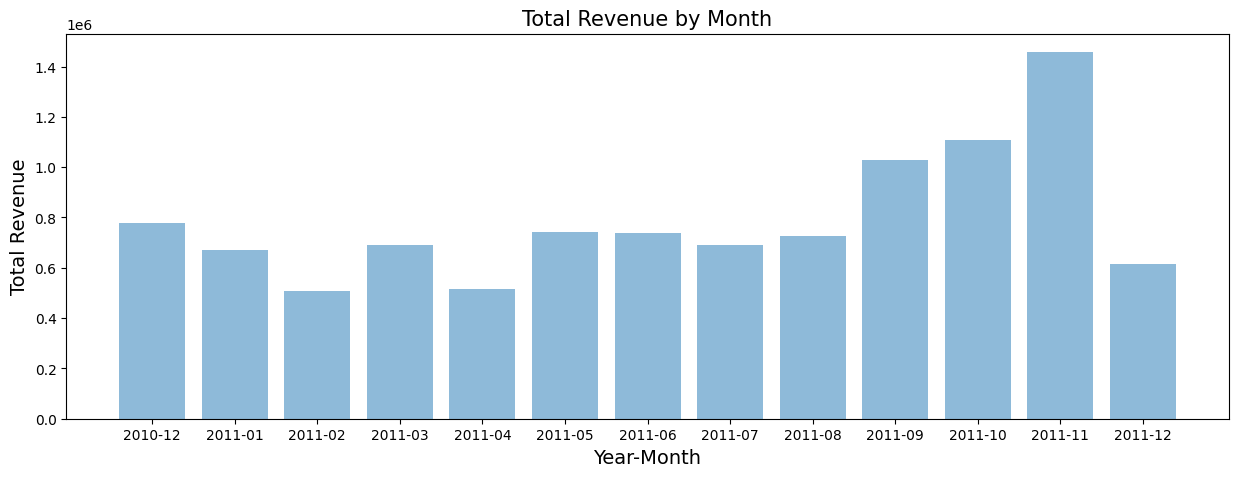

In [ ]:
temp = df2.loc[:,('InvoiceDate','Revenue')]
temp.InvoiceDate = df2.InvoiceDate.dt.to_period('M')
temp = temp.groupby(['InvoiceDate'])['Revenue'].sum()
temp = temp.reset_index(drop = False)


plt.figure(figsize=(15,5))
plt.bar(np.arange(len(temp['InvoiceDate'])), temp['Revenue'], align='center', alpha=0.5)
plt.xticks(np.arange(len(temp['InvoiceDate'])), temp['InvoiceDate'])
plt.ylabel('Total Revenue',fontsize=14)
plt.xlabel('Year-Month',fontsize=14)
plt.title('Total Revenue by Month',fontsize=15)

plt.show()



In [ ]:
#Now group the revenue by week
df2.RevWeek=df2.groupby(pd.Grouper(key='InvoiceDate', freq='W-MON'))['Revenue'].sum().reset_index().sort_values('InvoiceDate')
df2.RevWeek.head()

<ipython-input-117-c5ab8130a29a>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,InvoiceDate,Revenue
0,2010-12-06,233368.11
1,2010-12-13,286676.56
2,2010-12-20,198170.47
3,2010-12-27,59793.22
4,2011-01-03,0.00


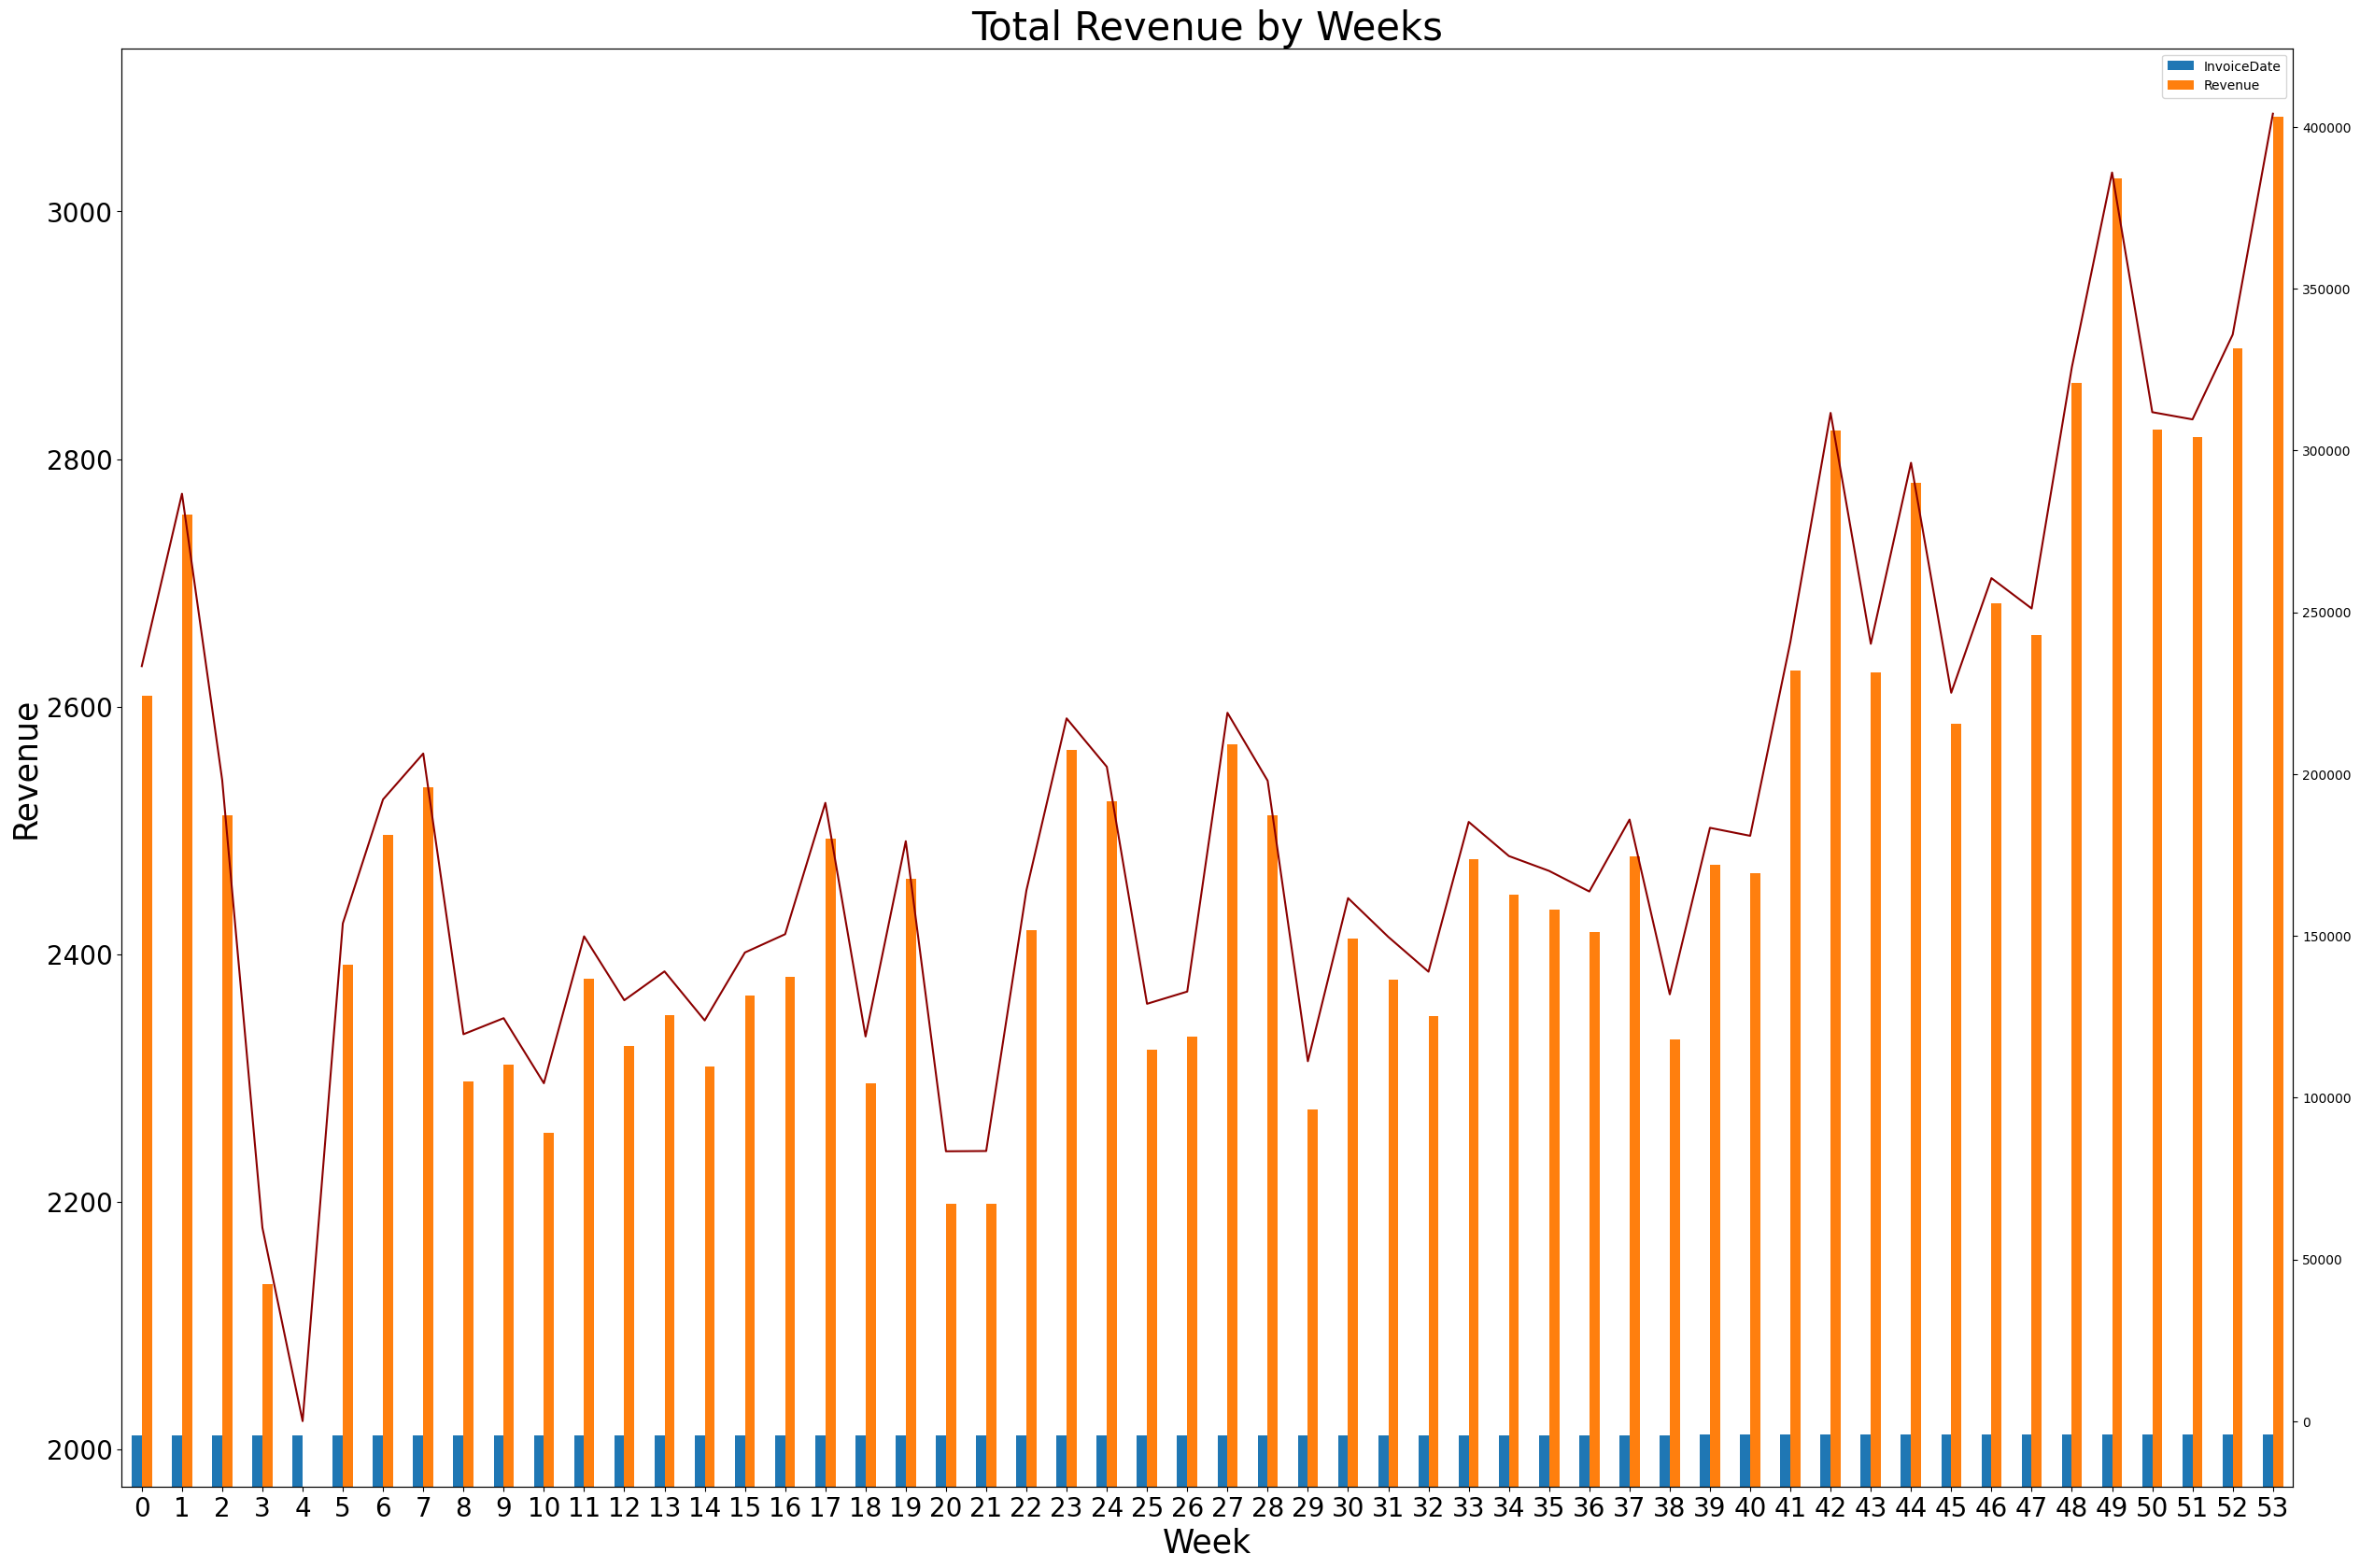

In [ ]:
# Now we combine our weekly revenue line chart with weekly revenue bar chart for better visualization
#On the 4th week, there was no transaction
Revenue1=df2.RevWeek.Revenue
Time1 =df2.RevWeek.InvoiceDate
df2.RevWeek.plot(kind='bar', title ="Total Revenue By Week", figsize=(30, 20), legend=True, fontsize=20)
plt.title('Total Revenue by Weeks',fontsize=30)
plt.xlabel("Week",fontsize=25)
plt.ylabel("Revenue",fontsize=25)
df2.RevWeek['Revenue'].plot(secondary_y=True,color="#8b0000")
plt.show()

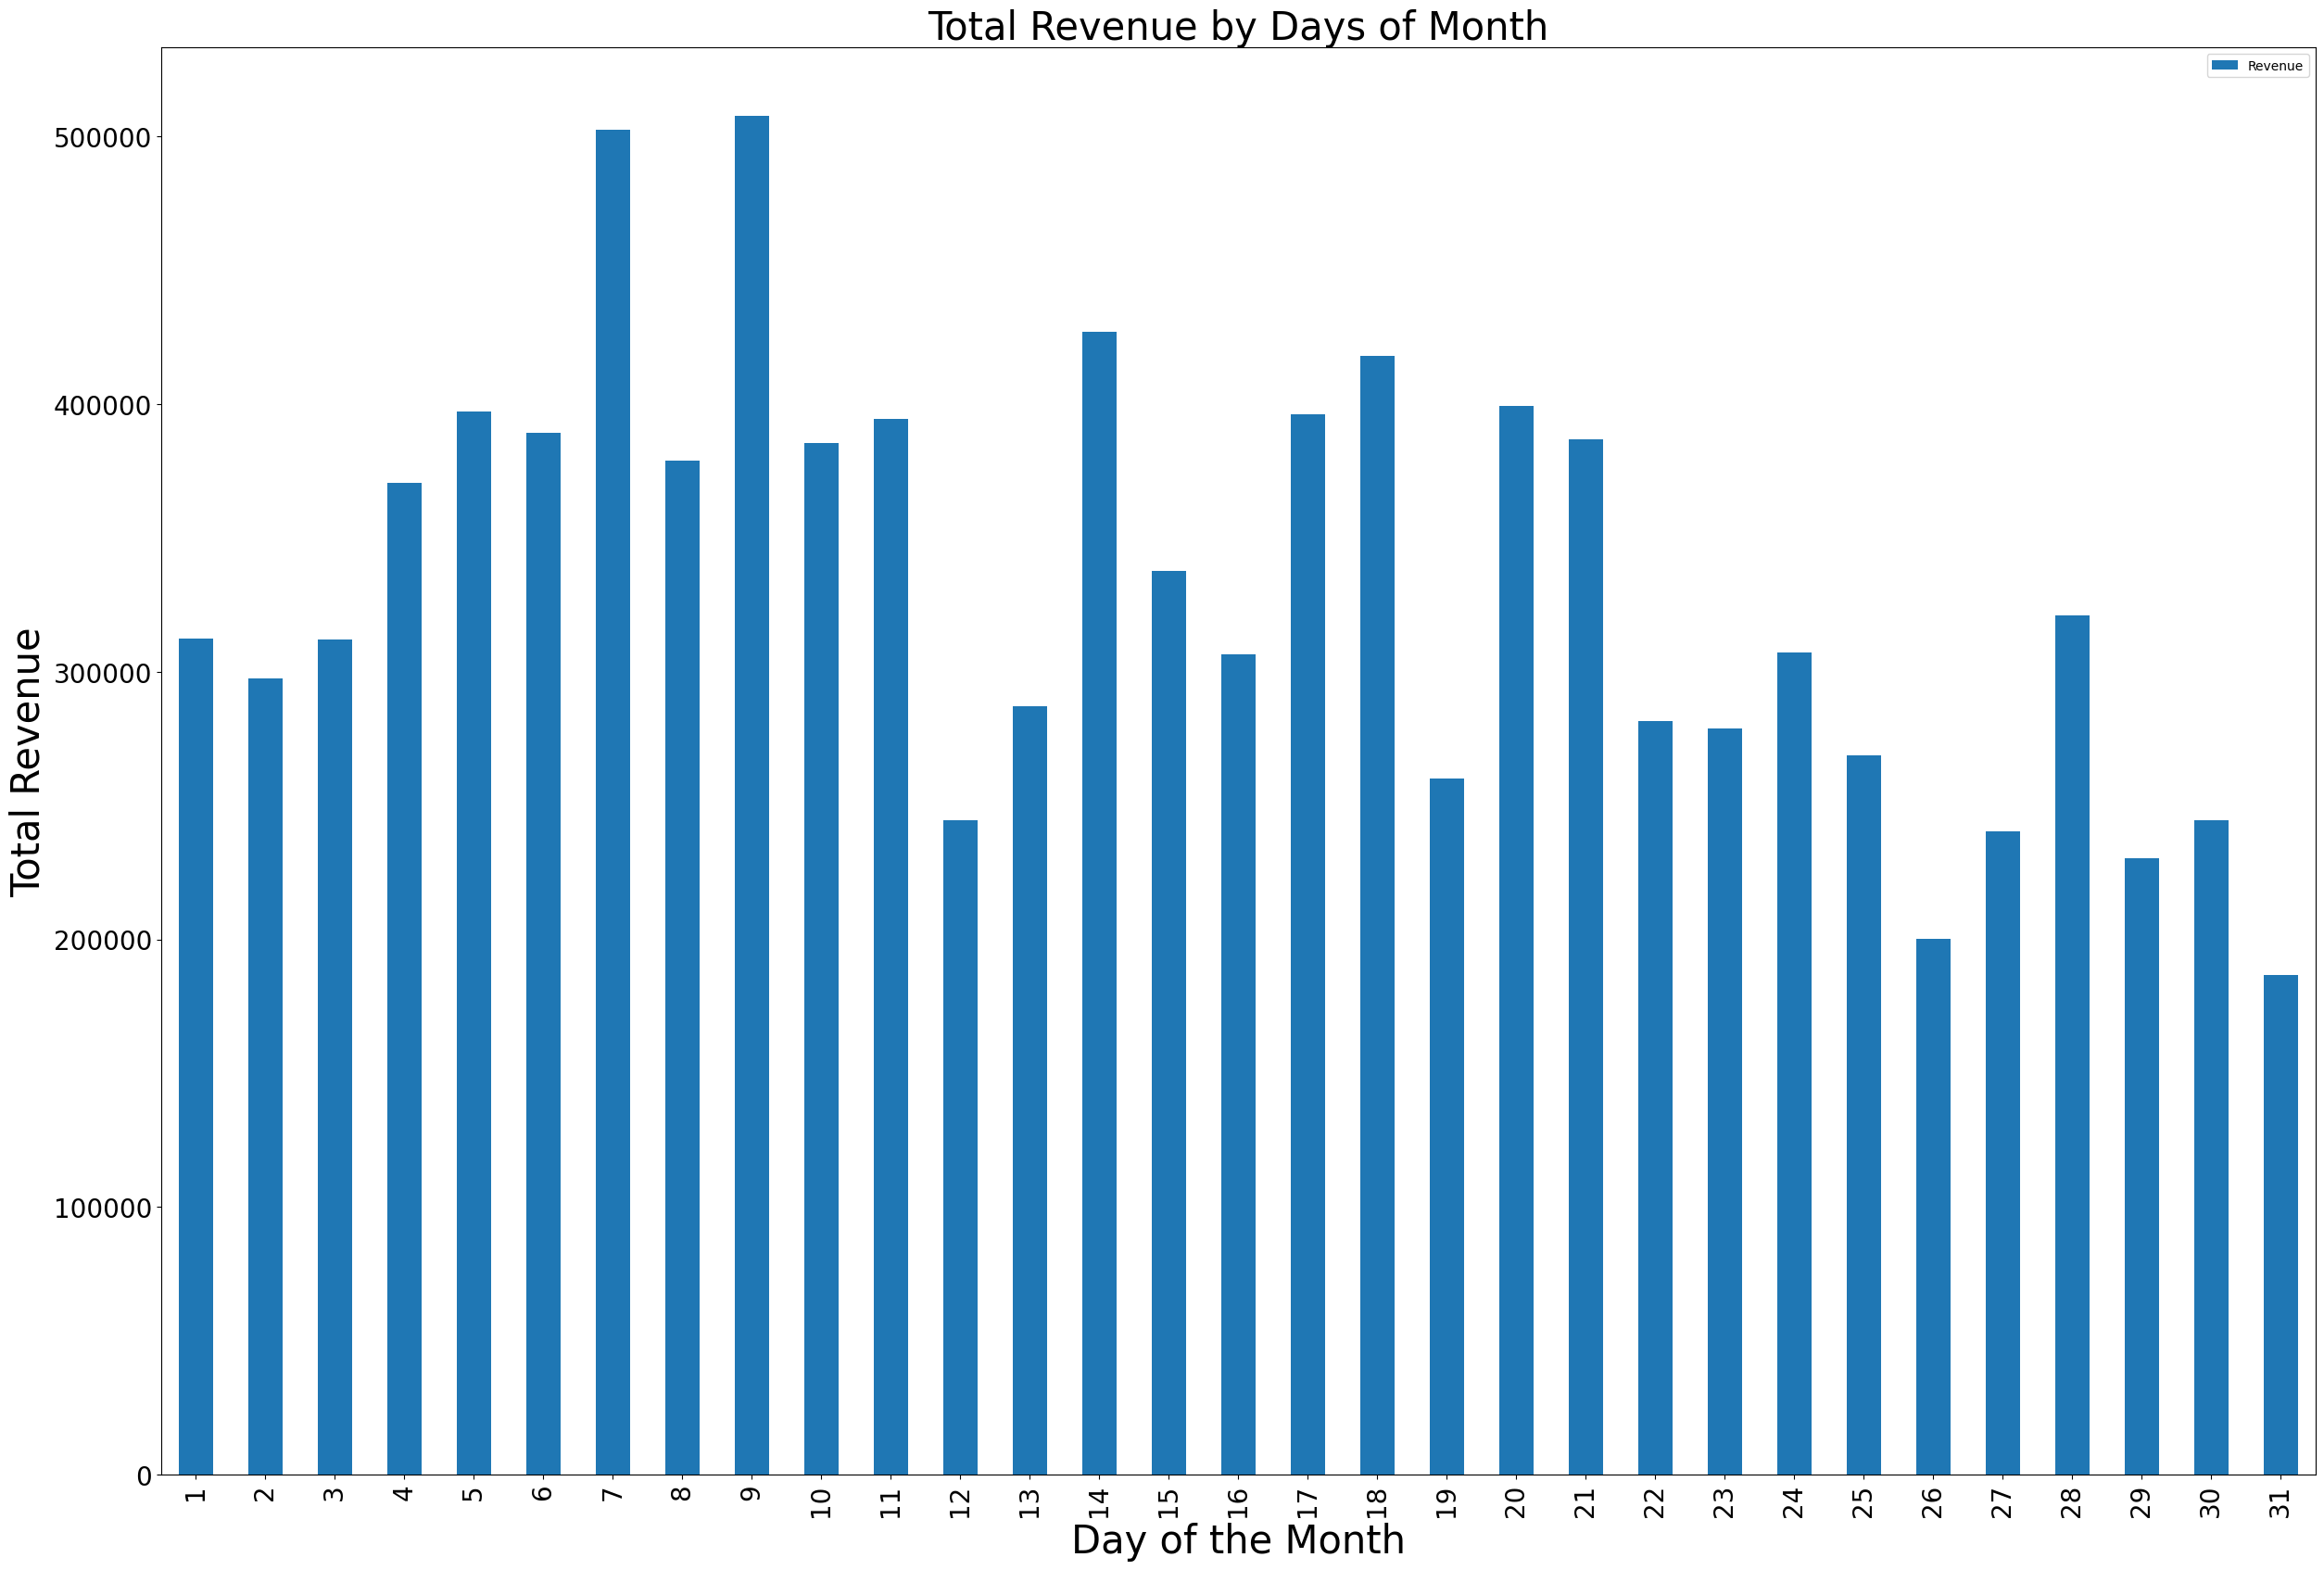

In [ ]:
#We are going to investigate sales by days of the month
df_Dmonth=df2.copy()
df_Dmonth["day"]=df_Dmonth["InvoiceDate"].dt.day

df_Dmontha=df_Dmonth.groupby("day")["Revenue"].sum()
df_Dmontha.plot(kind='bar', title ="V comp", figsize=(30, 20), legend=True, fontsize=20)
plt.title('Total Revenue by Days of Month',fontsize=30)
plt.ylabel('Total Revenue', fontsize=30)
plt.xlabel('Day of the Month', fontsize=30)
plt.show()
# we concluded that the sale surge at the earlu of the monthand  dwindle as it reach the end of month

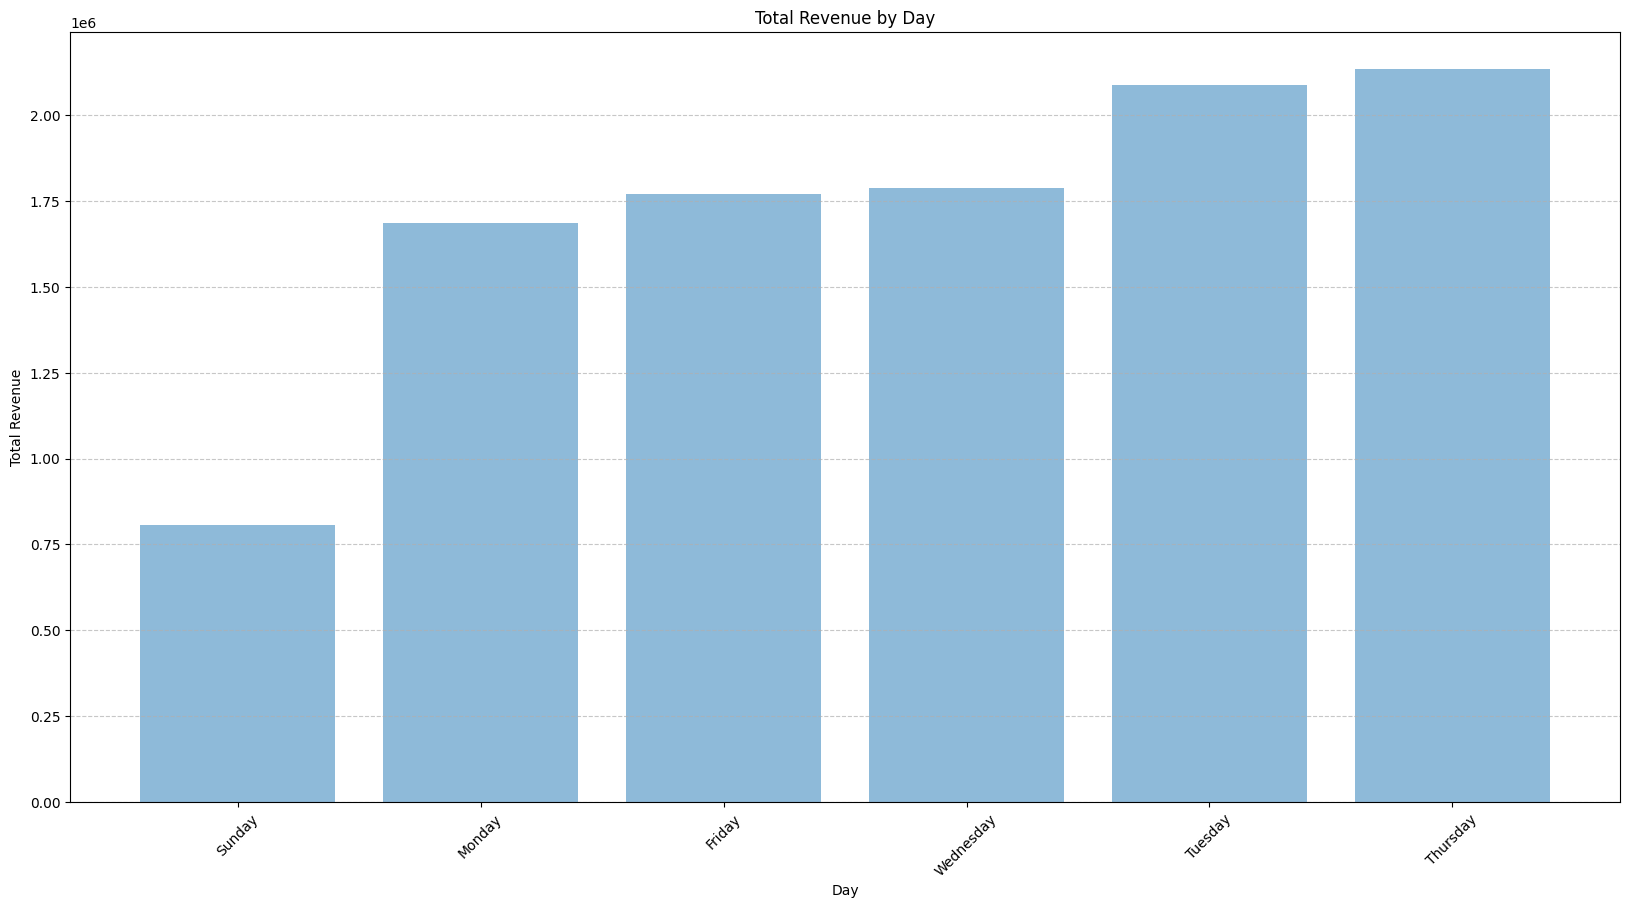

In [ ]:
temp = df2[['InvoiceDate', 'Revenue']]
temp2 = temp.groupby(temp['InvoiceDate'].dt.day_name())['Revenue'].sum().sort_values()

# Reset index and rename columns
temp2 = temp2.reset_index().rename(columns={'InvoiceDate': 'Day'})

# Plot
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(temp2['Day'])), temp2['Revenue'], align='center', alpha=0.5)
plt.xticks(np.arange(len(temp2['Day'])), temp2['Day'], rotation=45)
plt.ylabel('Total Revenue')
plt.xlabel('Day')
plt.title('Total Revenue by Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#Tuesday and thursday show the highest revenue, No revenue on Saturday